DEBUG - Base strength of Jabee: 1.1268901079636815
DEBUG - Skill combination: (6.659765325669396, 7.895651070363372)
DEBUG - Modified strength of player1: 1.1268901079636815
DEBUG - Modified strength of Jabee: 1.1268901079636815
DEBUG - Base strength of Sprite: 5.050598893166557
DEBUG - Skill combination: (7.895651070363372, 6.659765325669396)
DEBUG - Modified strength of player1: 5.050598893166557
DEBUG - Modified strength of Sprite: 5.050598893166557
DEBUG - Base strength of Jabee: 8.485497714953317
DEBUG - Skill combination: (6.659765325669396, 6.389021236769514)
DEBUG - Modified strength of player1: 8.485497714953317
DEBUG - Modified strength of Jabee: 8.485497714953317
DEBUG - Base strength of Sugar: 6.024246572532888
DEBUG - Skill combination: (6.389021236769514, 6.659765325669396)
DEBUG - Modified strength of player1: 6.024246572532888
DEBUG - Modified strength of Sugar: 6.024246572532888
DEBUG - Base strength of Sprite: 11.151185153681954
DEBUG - Skill combination: (7.895651070

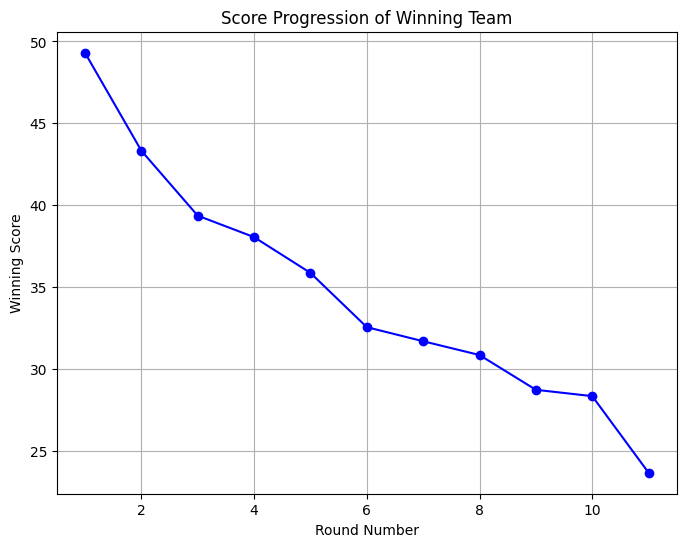

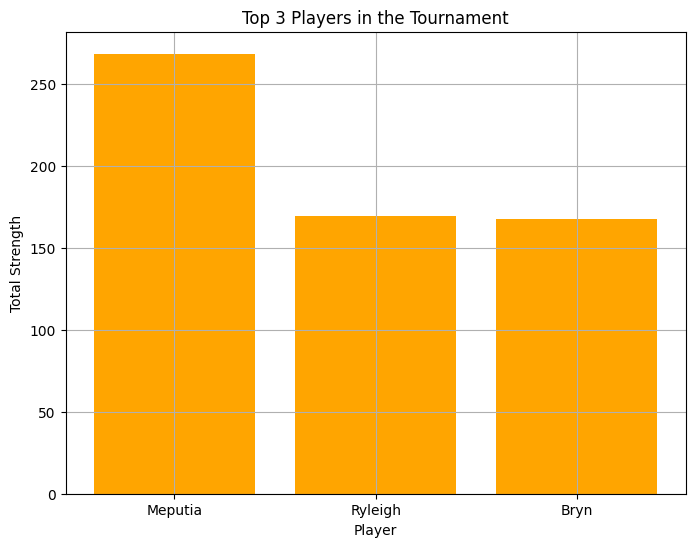

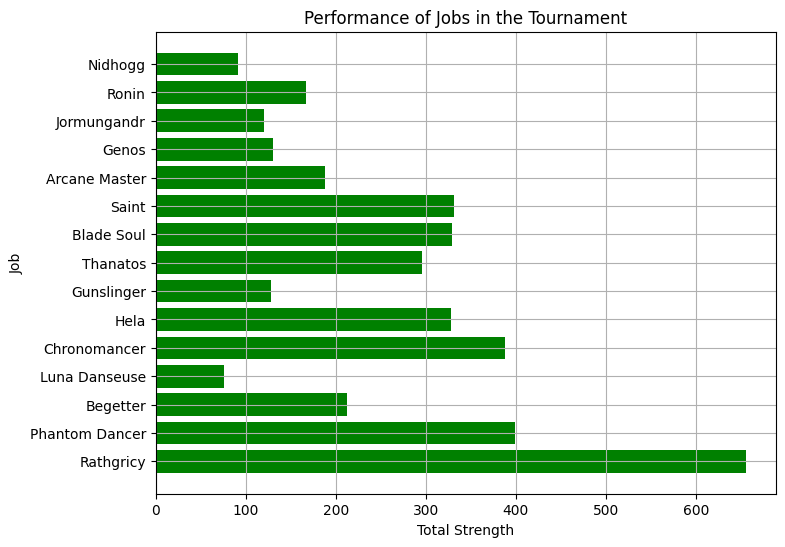

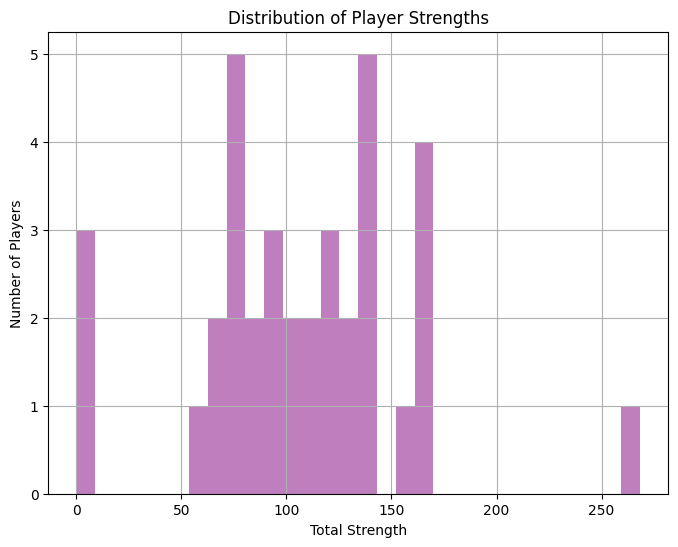

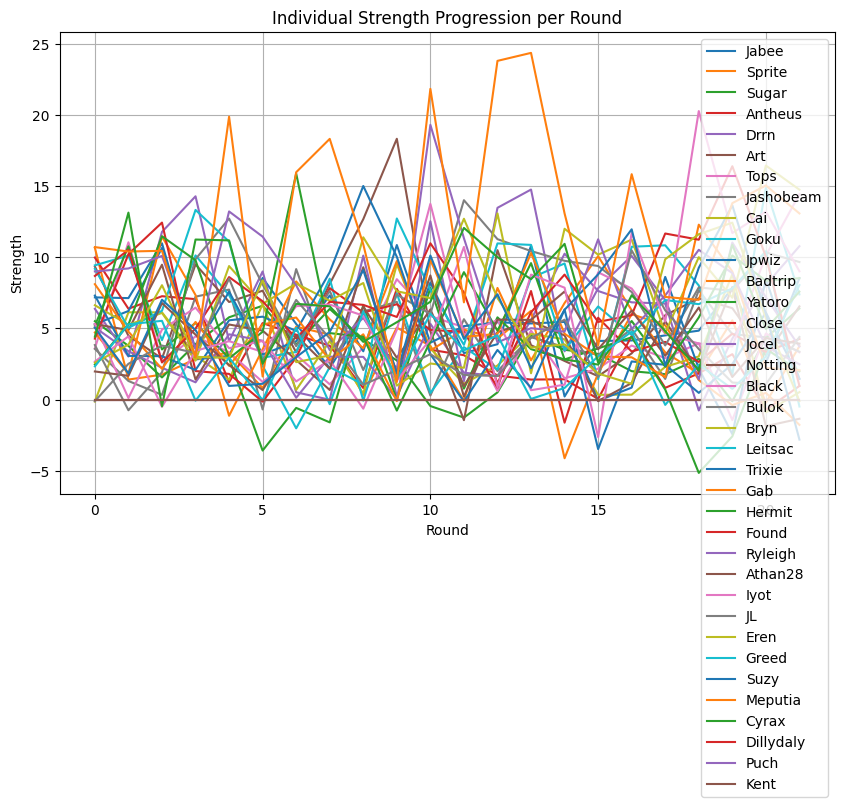

INFO - The Most Valuable Player of Tournament 2 is: Meputia
INFO - The winning team of Tournament 2 is: Team 11


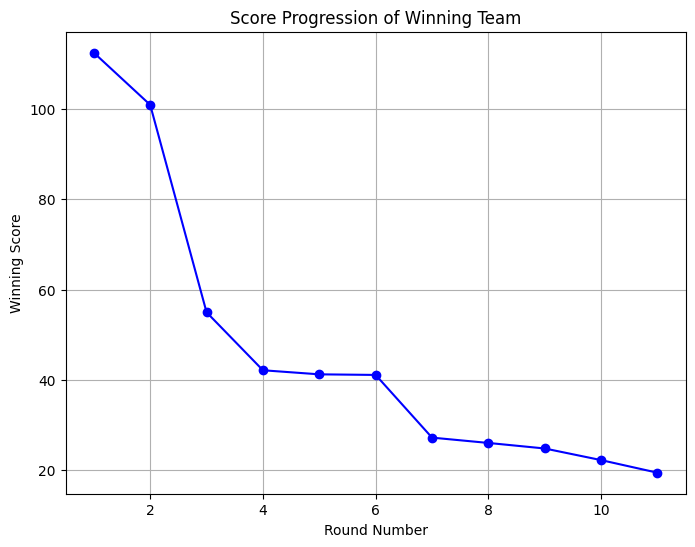

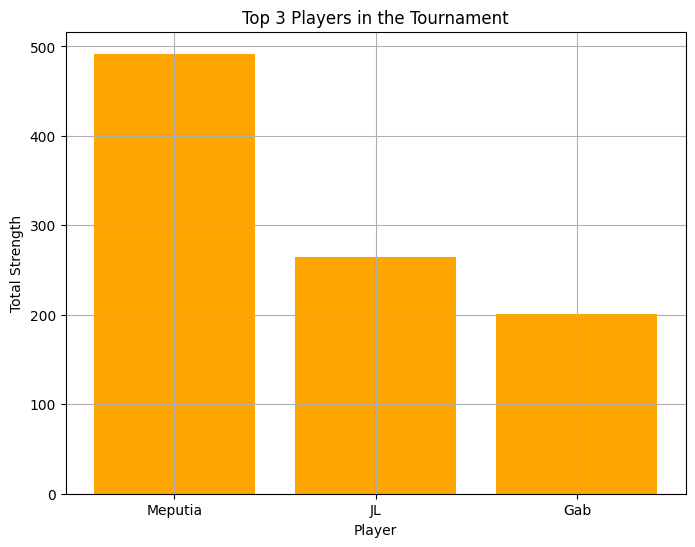

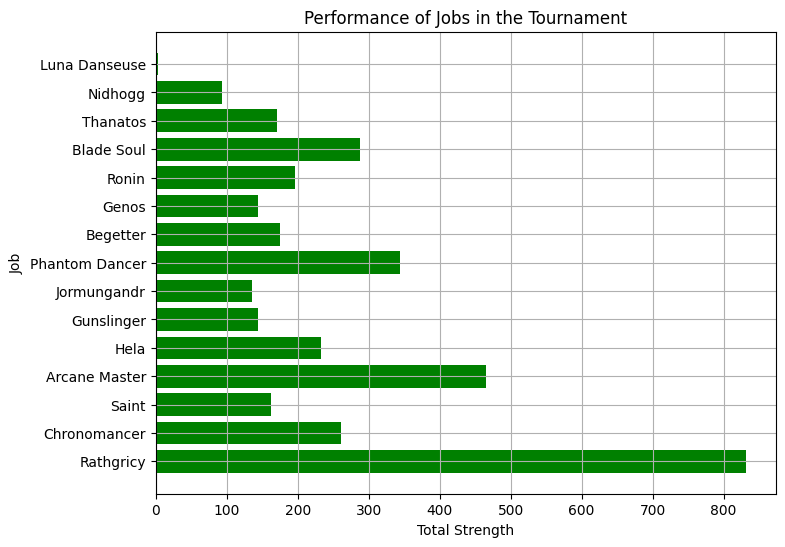

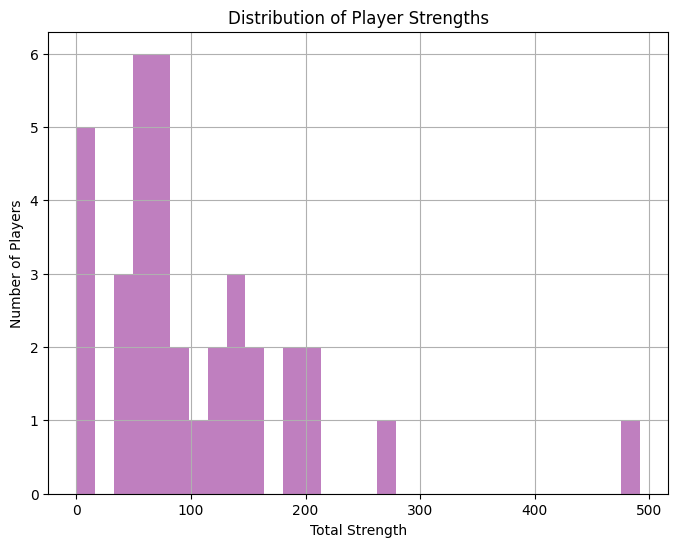

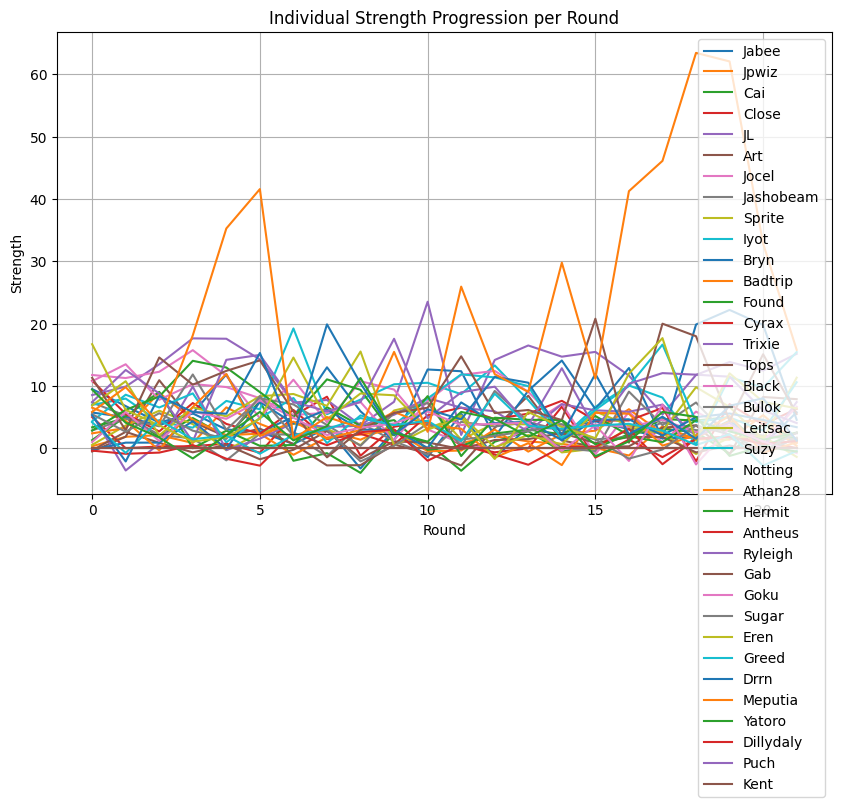

INFO - The Most Valuable Player of Tournament 3 is: Meputia
INFO - The winning team of Tournament 3 is: Team 8


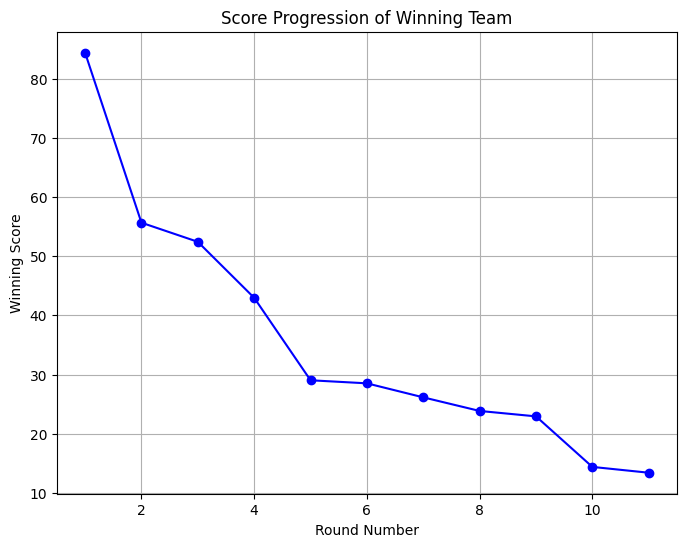

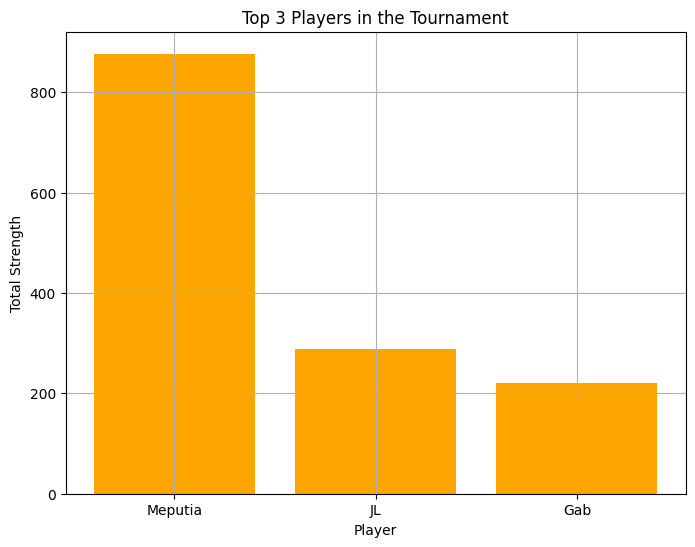

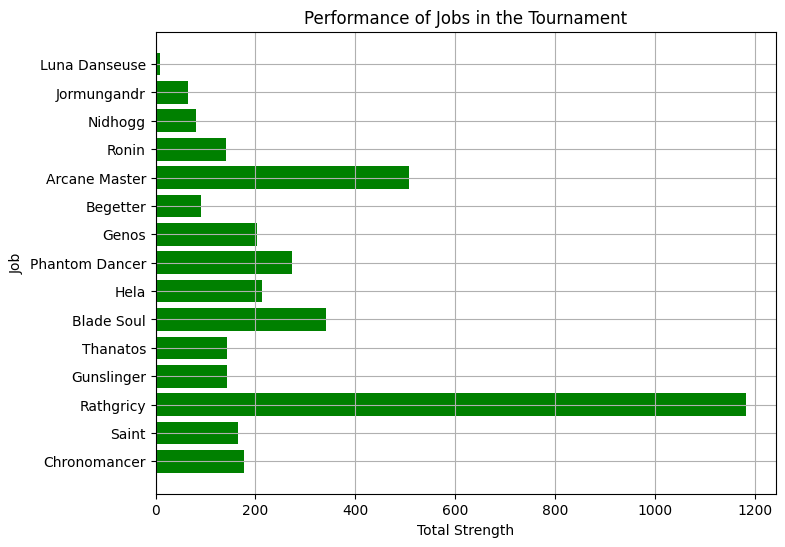

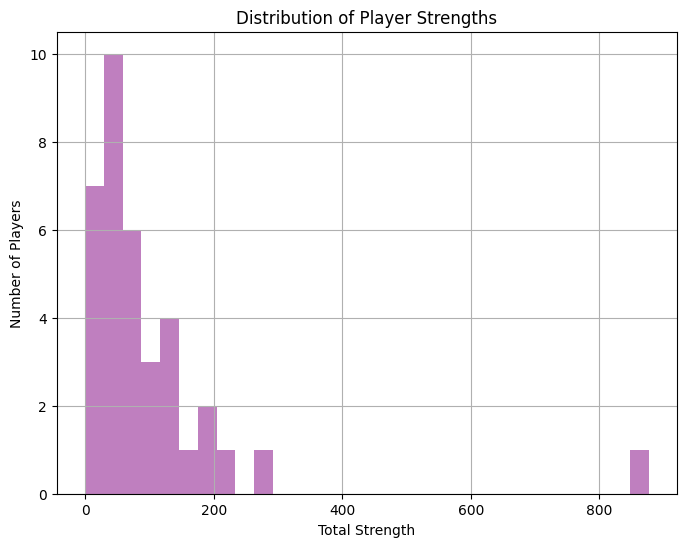

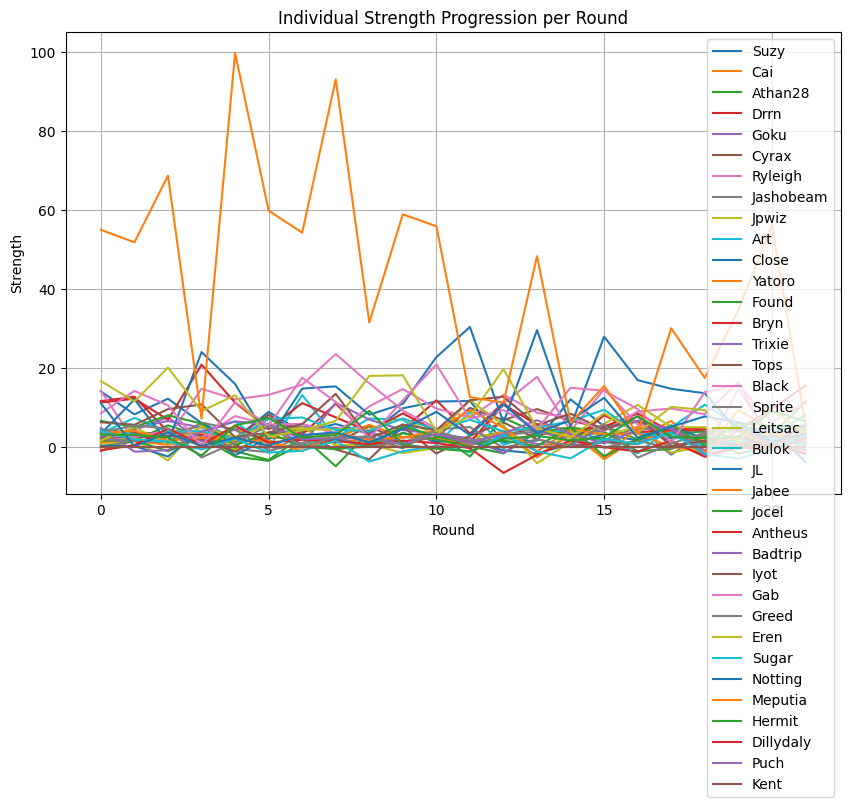

INFO - The Most Valuable Player of Tournament 4 is: Meputia
INFO - The winning team of Tournament 4 is: Team 1


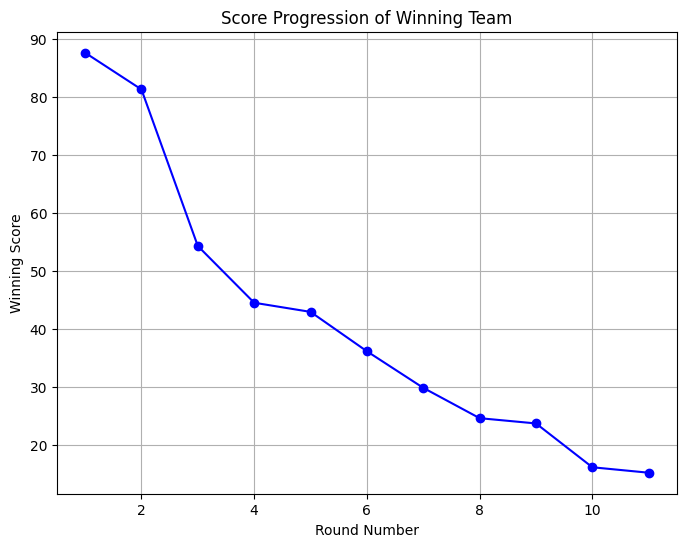

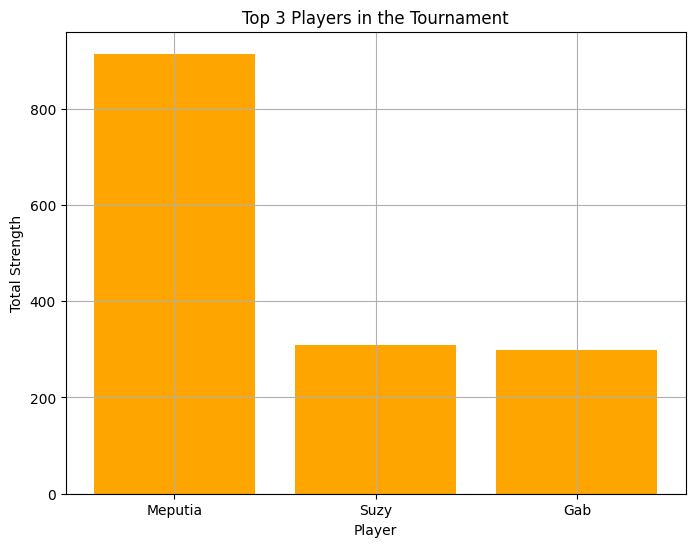

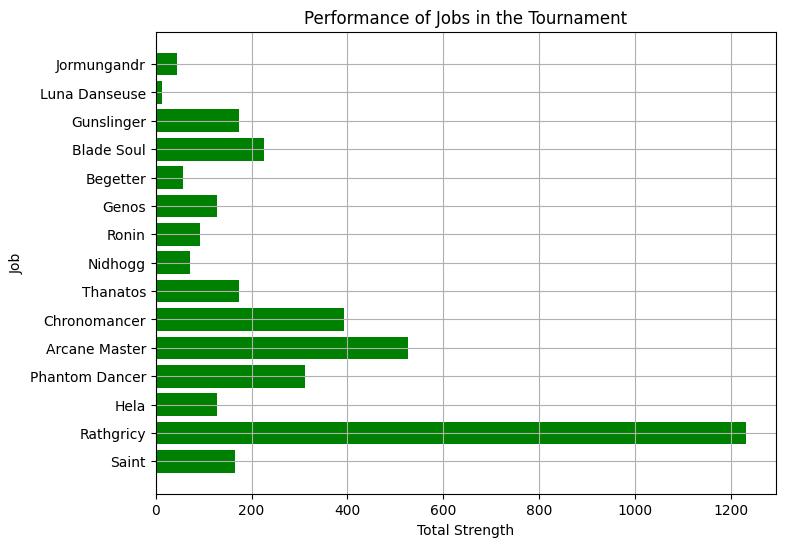

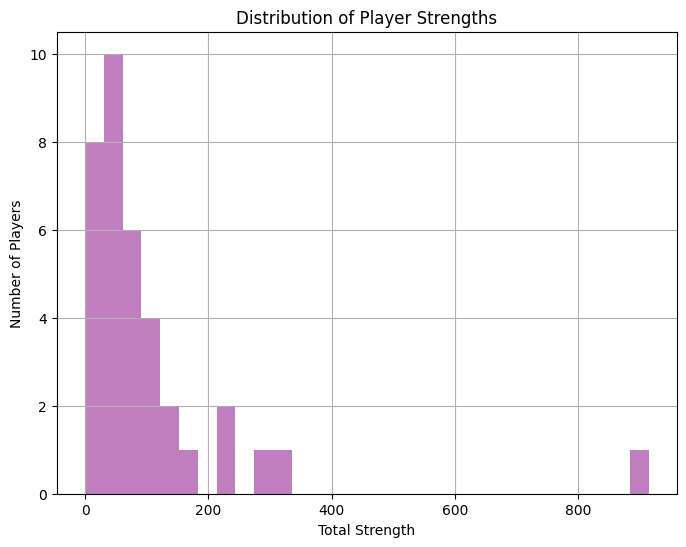

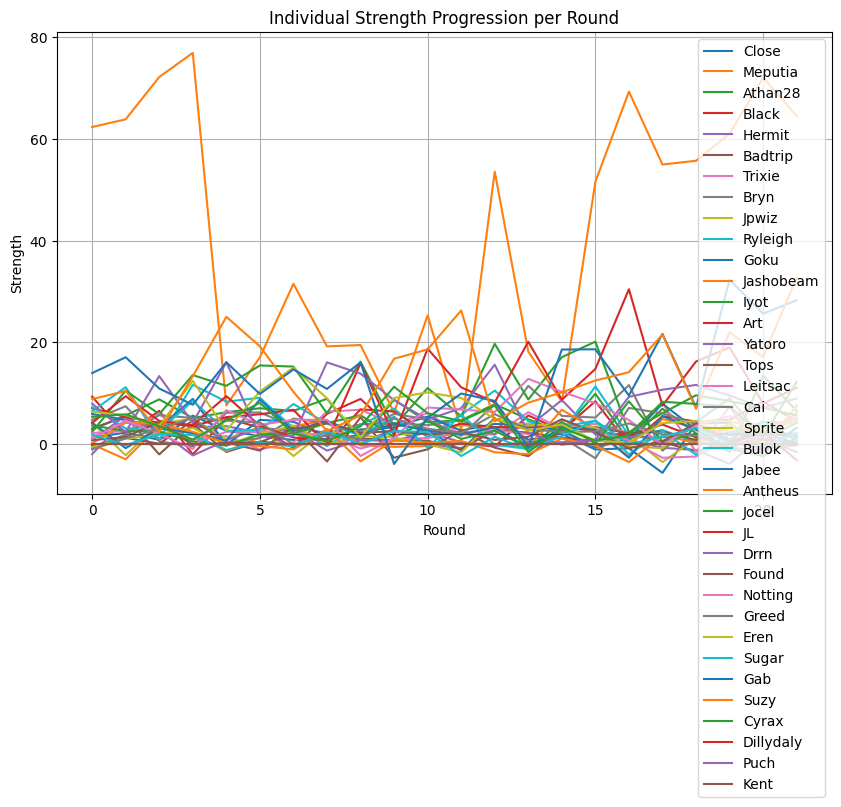

INFO - The Most Valuable Player of Tournament 5 is: Meputia
INFO - The winning team of Tournament 5 is: Team 5


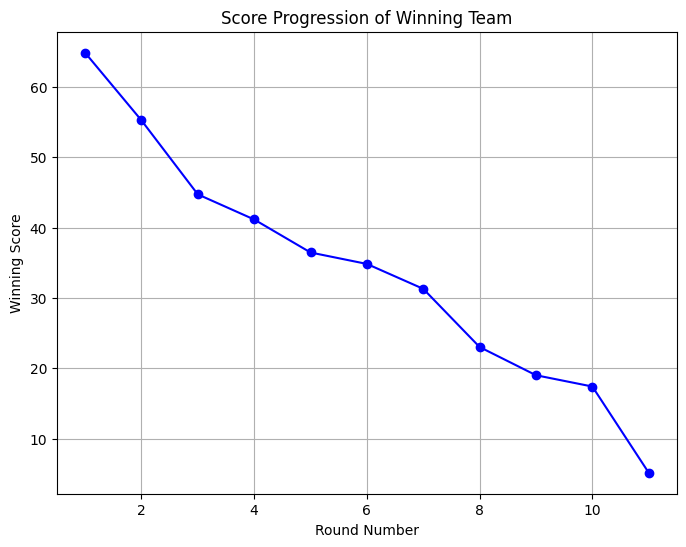

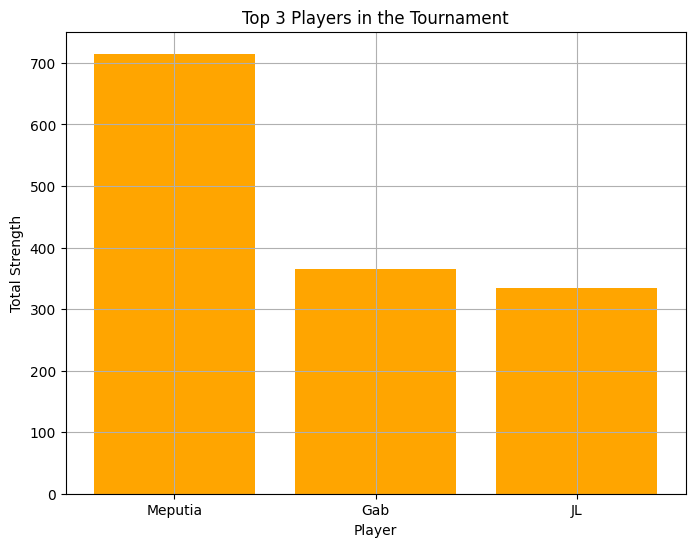

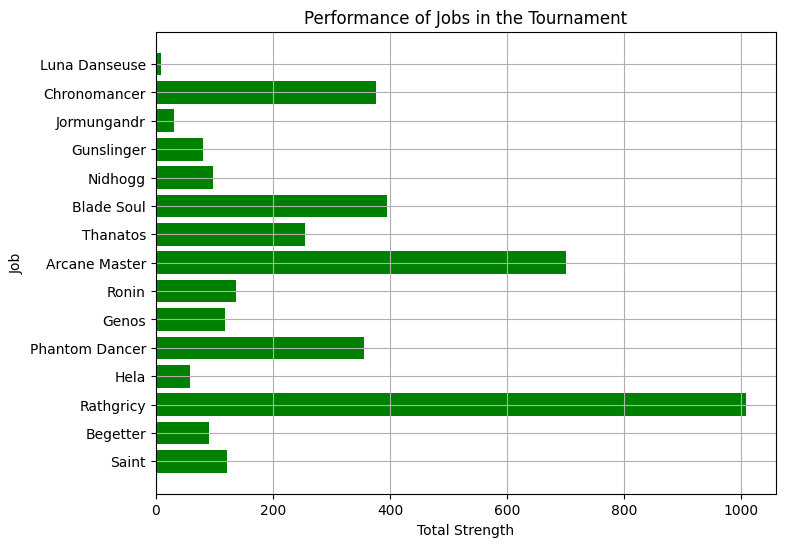

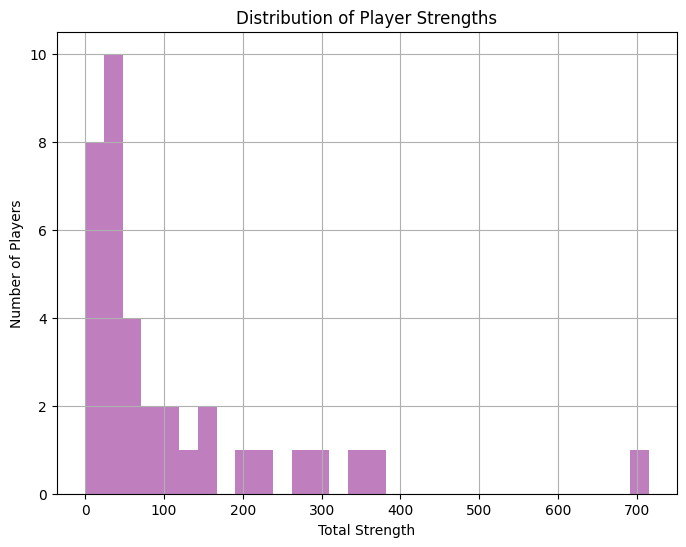

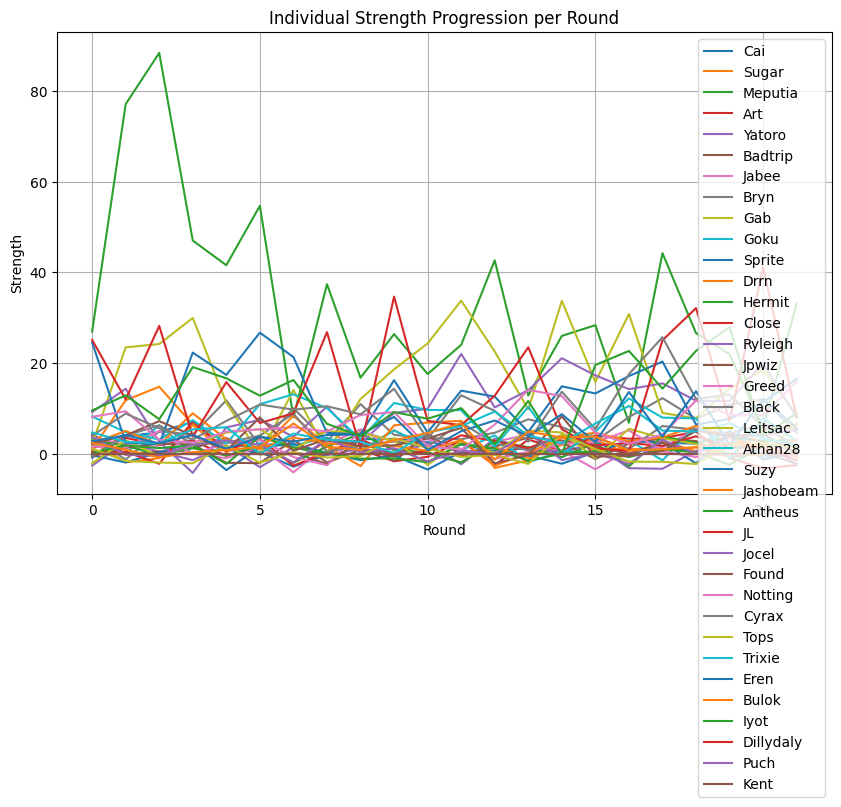

INFO - All MVPs: ['Meputia', 'Meputia', 'Meputia', 'Meputia', 'Meputia']
INFO - All winners: ['Team 2', 'Team 11', 'Team 8', 'Team 1', 'Team 5']


In [2]:
import random
import collections
import heapq
import matplotlib.pyplot as plt
import pandas as pd
import logging
from typing import List, Dict, Tuple

# Add logging configuration
logging.basicConfig(level=logging.DEBUG, format='%(levelname)s - %(message)s')


class SkillInteractions:
    """
    Represents skill interactions between players.
    """

    def __init__(self):
        # Define synergy, counter, status effects, combo breakers, buffs and debuffs
        self.synergy_dict = {('Fireball', 'Ignite'): 1.3, ('Charge', 'Stun'): 1.2}
        self.counter_dict = {('Reflect', 'PiercingStrike'): 0.5, ('Block', 'StrongAttack'): 0.3}
        self.status_effects_dict = {('Freeze', 'BurningAura'): 0.7, ('Paralysis', 'LightningStrike'): 0.6}
        self.combo_breakers_dict = {('Silence', 'ComboStrike'): 0.5, ('Interrupt', 'Berserk'): 0.6}
        self.buffs_debuffs_dict = {'Boost': 1.2, 'Slow': 0.8}

    def apply_skill_interactions(self, player1: 'Player', player2: 'Player') -> float:
        """
        Applies the skill interactions to modify the players' strengths.
        :param player1: The first player.
        :param player2: The second player.
        :return: The modified strength of player1.
        """
        p1_base_strength = player1.base_strength()
        skill_combination = (player1.skill, player2.skill)
        logging.debug(f"Skill combination: {skill_combination}")
        if skill_combination in self.synergy_dict:
            p1_base_strength *= self.synergy_dict[skill_combination]
        elif skill_combination in self.counter_dict:
            p1_base_strength *= self.counter_dict[skill_combination]
        elif skill_combination in self.status_effects_dict:
            p1_base_strength *= self.status_effects_dict[skill_combination]
        elif skill_combination in self.combo_breakers_dict:
            p1_base_strength *= self.combo_breakers_dict[skill_combination]
        if player1.skill in self.buffs_debuffs_dict:
            p1_base_strength *= self.buffs_debuffs_dict[player1.skill]
        logging.debug(f"Modified strength of player1: {p1_base_strength}")
        return float(p1_base_strength)


class Player:
    """
    Represents a player with their attributes.
    """

    def __init__(self, name: str, job: str, skill: int, equipment: int):
        """
        Initialize a Player object.
        :param name: The player's name.
        :param job: The player's job.
        :param skill: The player's skill level.
        :param equipment: The player's equipment level.
        """
        self.name = name
        self.job = job
        self.skill = int(skill)  # Convert skill to integer
        self.equipment = equipment
        self.average_strength = 0
        self.num_wins = 0

    @classmethod
    def randomize_skill(cls, job: str) -> int:
        """
        Randomizes the skill level based on the job.
        :param job: The job of the player.
        :return: The randomized skill level.
        """
        base_skill = JOB_RANKINGS[job]
        randomized_skill = random.randint(int(base_skill * 0.8), int(base_skill * 1.2))
        return randomized_skill

    def base_strength(self) -> float:
        """
        Calculate the base strength of the player based on their attributes.
        :return: The base strength of the player.
        """
        job_multiplier = random.uniform(0.8, 1.2)  # Randomize job multipliers each tournament
        job_ranking = random.randint(1, 10)  # Randomize job rankings each tournament
        base_strength = random.gauss(job_ranking * job_multiplier * self.equipment, GAUSSIAN_STD)
        logging.debug(f"Base strength of {self.name}: {base_strength}")
        return base_strength

    def strength(self, interactions: SkillInteractions, opponent: 'Player') -> float:
        """
        Calculate the modified strength of the player based on skill interactions.
        :param interactions: The SkillInteractions instance.
        :param opponent: The opponent player.
        :return: The modified strength of the player.
        """
        modified_strength = interactions.apply_skill_interactions(self, opponent)
        logging.debug(f"Modified strength of {self.name}: {modified_strength}")
        return modified_strength


class Team:
    """
    Represents a team of players.
    """

    def __init__(self, name: str, members: List[Player]):
        """
        Initialize a Team object.
        :param name: The name of the team.
        :param members: The members of the team.
        """
        self.name = name
        self.members = members

        assert len(self.members) == 3, "Team must have exactly three members"

    @classmethod
    def swap_players(cls, team1: 'Team', team2: 'Team') -> Tuple['Team', 'Team']:
        """
        Swaps random players between two teams to mix up team compositions.
        :param team1: The first team.
        :param team2: The second team.
        :return: The two teams with swapped players.
        """
        random_indices = random.sample(range(3), k=2)
        team1.members[random_indices[0]], team2.members[random_indices[1]] = team2.members[random_indices[1]], \
                                                                               team1.members[random_indices[0]]
        return team1, team2

    def strength(self, interactions: SkillInteractions) -> float:
        total_strength = 0.0  # Initialize as float
        for i in range(len(self.members)):
            for j in range(i + 1, len(self.members)):
                total_strength += self.members[i].strength(interactions, self.members[j])
                total_strength += self.members[j].strength(interactions, self.members[i])
        return total_strength


def calculate_mvp(player_performance: Dict[str, List[float]]) -> str:
    """
    Calculate the Most Valuable Player (MVP) based on the average strength of each player.
    :param player_performance: A dictionary of player performance.
    :return: The name of the MVP.
    """
    max_average_strength = 0
    mvp = ""
    for player, strengths in player_performance.items():
        if len(strengths) > 0:
            average_strength = sum(strengths) / len(strengths)
            if average_strength > max_average_strength:
                max_average_strength = average_strength
                mvp = player
    return mvp


def apply_buffs_debuffs(teams: Dict[str, Team]) -> None:
    """
    Apply random buffs and debuffs to players' skill levels based on their jobs.
    :param teams: A dictionary of teams.
    """
    for team in teams.values():
        for player in team.members:
            buff_debuff_multiplier = random.uniform(0.8, 1.2)
            player.skill *= buff_debuff_multiplier
            player.equipment *= buff_debuff_multiplier


def match(team1: Team, team2: Team, player_performance: Dict[str, List[float]],
          job_performance: Dict[str, float]) -> Tuple[Team, float]:
    """
    Simulate a match between two teams and update player and job performance dictionaries.
    :param team1: The first team.
    :param team2: The second team.
    :param player_performance: A dictionary to store player performance.
    :param job_performance: A dictionary to store job performance.
    :return: A tuple of the winning team and the maximum strength among the teams.
    """
    interactions = SkillInteractions()
    apply_buffs_debuffs({team1.name: team1, team2.name: team2})  # Apply buffs and debuffs

    strength1 = team1.strength(interactions)
    strength2 = team2.strength(interactions)

    weight1 = random.uniform(0.9, 1.1)
    weight2 = random.uniform(0.9, 1.1)
    strength1 *= weight1
    strength2 *= weight2

    if strength1 > strength2:
        winning_team = team1
    else:
        winning_team = team2

    # Update player and job performance
    for team in [team1, team2]:
        for player in team.members:
            player_strength = player.strength(interactions, opponent=team.members[0])
            player_performance[player.name].append(player_strength)
            job_performance[player.job] += player_strength

            player.average_strength = (player.average_strength * player.num_wins + player_strength) / (
                    player.num_wins + 1)
            player.num_wins += 1

    return winning_team, max(strength1, strength2)


def tournament(teams: Dict[str, Team], num_tournaments: int) -> List[Tuple[Team, List[float], Dict[str, List[float]], Dict[str, float]]]:
    """
    Simulate multiple tournaments and calculate the winners and performance metrics.
    :param teams: A dictionary of teams.
    :param num_tournaments: Number of tournaments to run.
    :return: A list of tuples containing the winning team, winning strengths, player performance, and job performance for each tournament.
    """
    tournament_results = []

    for _ in range(num_tournaments):
        player_performance = {player.name: [] for team in teams.values() for player in team.members}
        job_performance = collections.defaultdict(float)

        teams_list = list(teams.values())
        num_teams = len(teams_list)
        matches_per_round = (num_teams - 1)
        total_rounds = num_teams - 1

        for current_round in range(total_rounds):
            round_results = []

            for match_number in range(matches_per_round):
                team1_index = (current_round + match_number) % (num_teams - 1)
                team2_index = (num_teams - 1 - match_number + current_round) % (num_teams - 1)
                team1 = teams_list[team1_index]
                team2 = teams_list[team2_index]
                # Occasionally swap players between teams
                if random.random() < 0.2:
                    team1, team2 = Team.swap_players(team1, team2)
                winning_team, winning_strength = match(team1, team2, player_performance, job_performance)
                round_results.append((winning_team, winning_strength))

            round_results.sort(key=lambda x: x[1], reverse=True)
            winning_team = round_results[0][0]
            winning_strengths = [strength for _, strength in round_results]

            team_rankings = collections.Counter(team for team, _ in round_results)
            teams_list.sort(key=lambda x: team_rankings[x], reverse=True)

        tournament_results.append((teams_list[0], winning_strengths, player_performance, job_performance))

    return tournament_results


class Plotter:
    """
    Handles plotting functionalities for the tournament results.
    """

    @staticmethod
    def progression(winning_strengths: List[float]) -> None:
        """
        Plot the progression of the winning team's score in each round of the tournament.
        :param winning_strengths: A list of winning strengths in each round.
        """
        plt.figure(figsize=(8, 6))
        plt.plot(range(1, len(winning_strengths) + 1), winning_strengths, color='blue', marker='o')
        plt.xlabel('Round Number')
        plt.ylabel('Winning Score')
        plt.title('Score Progression of Winning Team')
        plt.grid(True)
        plt.show()

    @staticmethod
    def top_players(player_performance: Dict[str, List[float]]) -> None:
        """
        Plot the top 3 players in the tournament based on their total strength.
        :param player_performance: A dictionary of player performance.
        """
        total_strengths = {player: sum(performance) for player, performance in player_performance.items()}
        top_players = heapq.nlargest(3, total_strengths, key=total_strengths.get)
        top_scores = [total_strengths[player] for player in top_players]

        plt.figure(figsize=(8, 6))
        plt.bar(top_players, top_scores, color='orange')
        plt.xlabel('Player')
        plt.ylabel('Total Strength')
        plt.title('Top 3 Players in the Tournament')
        plt.grid(True)
        plt.show()

    @staticmethod
    def job_performance(job_performance: Dict[str, float]) -> None:
        """
        Plot the performance of jobs in the tournament based on their total strength.
        :param job_performance: A dictionary of job performance.
        """
        jobs = list(job_performance.keys())
        performances = list(job_performance.values())

        plt.figure(figsize=(8, 6))
        plt.barh(jobs, performances, color='green')
        plt.xlabel('Total Strength')
        plt.ylabel('Job')
        plt.title('Performance of Jobs in the Tournament')
        plt.grid(True)
        plt.show()

    @staticmethod
    def distribution_of_strengths(player_performance: Dict[str, List[float]]) -> None:
        """
        Plot the distribution of player strengths in the tournament.
        :param player_performance: A dictionary of player performance.
        """
        strengths = [sum(performance) for performance in player_performance.values()]

        plt.figure(figsize=(8, 6))
        plt.hist(strengths, bins=NUM_BINS, alpha=0.5, color='purple')
        plt.xlabel('Total Strength')
        plt.ylabel('Number of Players')
        plt.title('Distribution of Player Strengths')
        plt.grid(True)
        plt.show()

    @staticmethod
    def individual_progression(player_performance: Dict[str, List[float]]) -> None:
        """
        Plot the individual strength progression of each player in the tournament.
        :param player_performance: A dictionary of player performance.
        """
        max_rounds = max(len(performance) for performance in player_performance.values())

        padded_performance = {
            player: performance + [0.0] * (max_rounds - len(performance)) for player, performance in
            player_performance.items()
        }

        df = pd.DataFrame(padded_performance)
        plt.figure(figsize=(10, 6))
        plt.plot(df)
        plt.xlabel('Round')
        plt.ylabel('Strength')
        plt.title('Individual Strength Progression per Round')
        plt.grid(True)
        plt.legend(df.columns)
        plt.show()


GAUSSIAN_STD = 2
NUM_BINS = 30

JOB_RANKINGS = {
    'Arcane Master': 7,
    'Chronomancer': 8,
    'Stellar Hunter': 6,
    'Saint': 8,
    'Begetter': 8,
    'Gunslinger': 7,
    'Nidhogg': 6,
    'Genos': 8,
    'Rathgricy': 7,
    'Thanatos': 8,
    'Hela': 7,
    'Blade Soul': 8,
    'Jormungandr': 6,
    'Phantom Dancer': 7,
    'Luna Danseuse': 8,
    'Ronin': 6,
}

JOB_MULTIPLIERS = {
    'Arcane Master': 1.1,
    'Chronomancer': 1.2,
    'Stellar Hunter': 1.0,
    'Saint': 1.2,
    'Begetter': 1.2,
    'Gunslinger': 1.1,
    'Nidhogg': 0.9,
    'Genos': 1.2,
    'Rathgricy': 1.1,
    'Thanatos': 1.2,
    'Hela': 1.1,
    'Blade Soul': 1.2,
    'Jormungandr': 0.9,
    'Phantom Dancer': 1.1,
    'Luna Danseuse': 1.2,
    'Ronin': 0.9,
}


def main():
    """
    Main function to run the 3vs3 tournament simulation.
    """
    team_names = ['Team 1', 'Team 2', 'Team 3', 'Team 4', 'Team 5', 'Team 6',
                  'Team 7', 'Team 8', 'Team 9', 'Team 10', 'Team 11', 'Team 12']

    team_members = [
        [Player('Jabee', 'Rathgricy', Player.randomize_skill('Rathgricy'), 1),
         Player('Sprite', 'Phantom Dancer', Player.randomize_skill('Phantom Dancer'), 1),
         Player('Sugar', 'Begetter', Player.randomize_skill('Begetter'), 1)],
        [Player('Antheus', 'Luna Danseuse', Player.randomize_skill('Luna Danseuse'), 1),
         Player('Drrn', 'Gunslinger', Player.randomize_skill('Gunslinger'), 1),
         Player('Art', 'Hela', Player.randomize_skill('Hela'), 1)],
        [Player('Tops', 'Blade Soul', Player.randomize_skill('Blade Soul'), 1),
         Player('Jashobeam', 'Phantom Dancer', Player.randomize_skill('Phantom Dancer'), 1),
         Player('Cai', 'Saint', Player.randomize_skill('Saint'), 1)],
        [Player('Goku', 'Thanatos', Player.randomize_skill('Thanatos'), 1),
         Player('Jpwiz', 'Chronomancer', Player.randomize_skill('Chronomancer'), 1),
         Player('Badtrip', 'Phantom Dancer', Player.randomize_skill('Phantom Dancer'), 1)],
        [Player('Yatoro', 'Hela', Player.randomize_skill('Hela'), 1),
         Player('Close', 'Saint', Player.randomize_skill('Saint'), 1),
         Player('Jocel', 'Jormungandr', Player.randomize_skill('Jormungandr'), 1)],
        [Player('Notting', 'Blade Soul', Player.randomize_skill('Blade Soul'), 1),
         Player('Black', 'Rathgricy', Player.randomize_skill('Rathgricy'), 1),
         Player('Bulok', 'Saint', Player.randomize_skill('Saint'), 1)],
        [Player('Bryn', 'Ronin', Player.randomize_skill('Ronin'), 1),
         Player('Leitsac', 'Begetter', Player.randomize_skill('Begetter'), 1),
         Player('Trixie', 'Nidhogg', Player.randomize_skill('Nidhogg'), 1)],
        [Player('Gab', 'Arcane Master', Player.randomize_skill('Arcane Master'), 1),
         Player('Hermit', 'Hela', Player.randomize_skill('Hela'), 1),
         Player('Found', 'Chronomancer', Player.randomize_skill('Chronomancer'), 1)],
        [Player('Ryleigh', 'Blade Soul', Player.randomize_skill('Blade Soul'), 1),
         Player('Athan28', 'Rathgricy', Player.randomize_skill('Rathgricy'), 1),
         Player('Iyot', 'Phantom Dancer', Player.randomize_skill('Phantom Dancer'), 1)],
        [Player('JL', 'Arcane Master', Player.randomize_skill('Arcane Master'), 1),
         Player('Eren', 'Genos', Player.randomize_skill('Genos'), 1),
         Player('Greed', 'Rathgricy', Player.randomize_skill('Rathgricy'), 1)],
        [Player('Suzy', 'Chronomancer', Player.randomize_skill('Chronomancer'), 1),
         Player('Meputia', 'Rathgricy', Player.randomize_skill('Rathgricy'), 2),
         Player('Cyrax', 'Thanatos', Player.randomize_skill('Thanatos'), 1)],
        [Player('Dillydaly', 'Stellar Hunter', Player.randomize_skill('Stellar Hunter'), 1),
         Player('Puch', 'Hela', Player.randomize_skill('Hela'), 1),
         Player('Kent', 'Begetter', Player.randomize_skill('Begetter'), 1)],
    ]

    teams = {name: Team(name, members) for name, members in zip(team_names, team_members)}

    num_tournaments = 5  # Number of tournaments to run
    tournament_results = tournament(teams, num_tournaments)

    all_mvp = []
    all_winners = []
    plotter = Plotter()

    for tournament_index, result in enumerate(tournament_results):
        winner, winning_strengths, player_performance, job_performance = result
        mvp = calculate_mvp(player_performance)
        logging.info(f"The Most Valuable Player of Tournament {tournament_index + 1} is: {mvp}")
        logging.info(f"The winning team of Tournament {tournament_index + 1} is: {winner.name}")
        all_mvp.append(mvp)
        all_winners.append(winner.name)

        # Plot tournament results
        plotter.progression(winning_strengths)
        plotter.top_players(player_performance)
        plotter.job_performance(job_performance)
        plotter.distribution_of_strengths(player_performance)
        plotter.individual_progression(player_performance)

    logging.info(f"All MVPs: {all_mvp}")
    logging.info(f"All winners: {all_winners}")


if __name__ == '__main__':
    main()
